<a href="https://colab.research.google.com/github/siddharthramagiri/Machine-Learning/blob/main/Google_PlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
store_data = pd.read_csv("/content/googleplaystore.csv")
store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print(store_data.shape)
store_data.isna().sum()

# Therefore we have Null values in (Rating, CurrentVersion, AndroidVersion)   Dropnulls -> [Type, Content rating]

(10841, 13)


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [6]:
mean_Ratings = store_data['Rating'].mean()
print(f"mean is : {mean_Ratings}")
store_data['Rating'].fillna(mean_Ratings,inplace=True)
store_data = store_data.where((pd.notnull(store_data)),'')


store_data.isnull().sum()

mean is : 4.193338315362443


,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


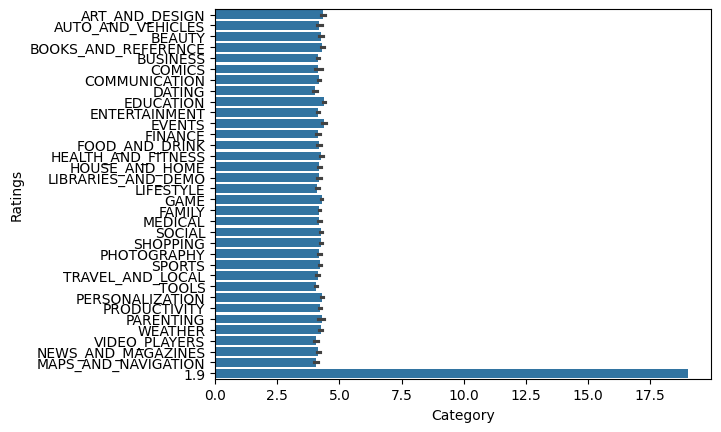

In [7]:
sns.barplot(data=store_data,x='Rating',y='Category')
plt.xlabel('Category')
plt.ylabel('Ratings')

plt.show()

In [8]:
X = store_data.drop(columns=['Genres','Last Updated','Price','Current Ver','Android Ver'])
Y = store_data['Genres']
X.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=3,test_size=0.2)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df= 1, stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = feature_extraction.transform(Y_train)
# Y_test = feature_extraction.transform(Y_test)

In [11]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoders = {}
for column in ['Category', 'Type', 'Content Rating']:
    le = LabelEncoder()
    store_data[column] = le.fit_transform(store_data[column])
    label_encoders[column] = le

X = store_data[['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']]
y = store_data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)